In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [6]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

model = Model(base_model.input, x)

17225924/17225924 [==============================] - 4s 0us/step


In [7]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [17]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "C:/Users/Lenovo/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )

train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [18]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "C:/Users/Lenovo/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


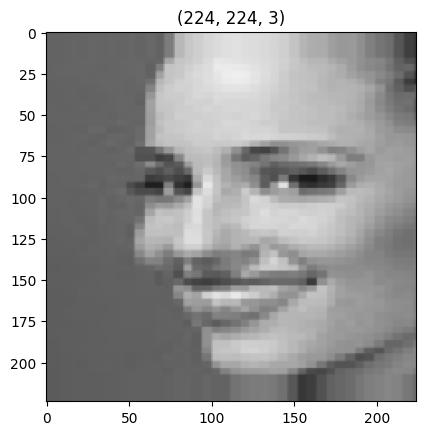

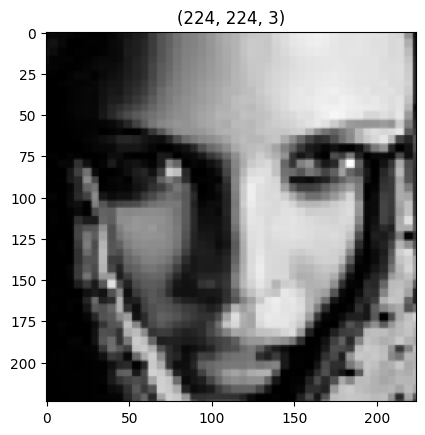

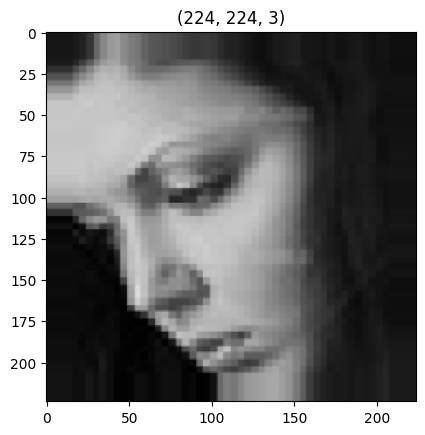

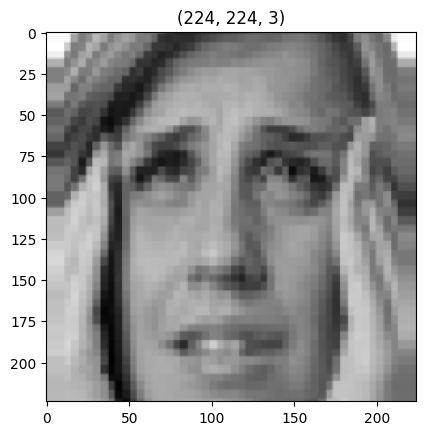

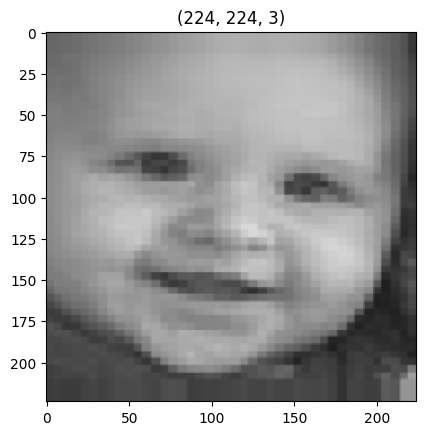

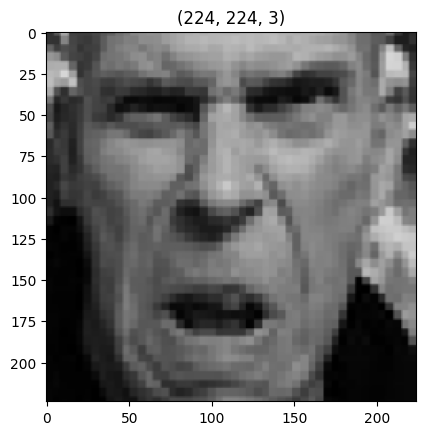

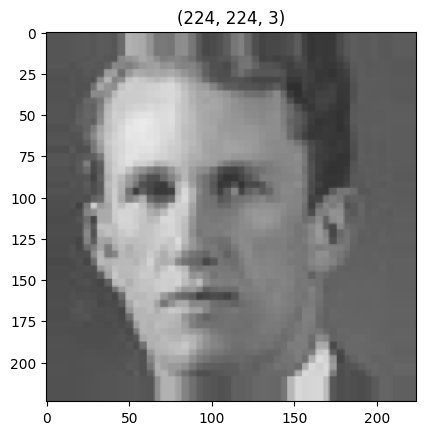

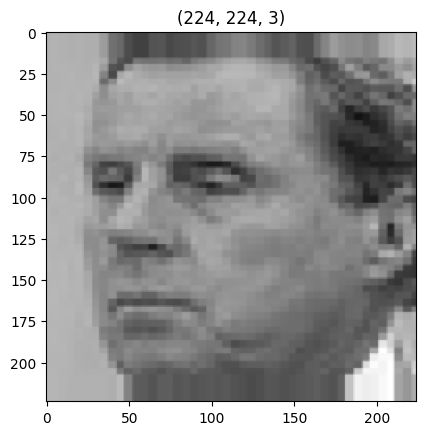

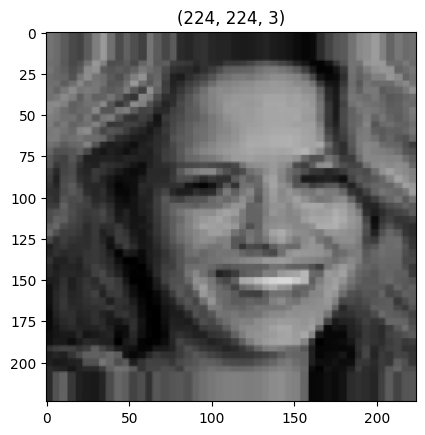

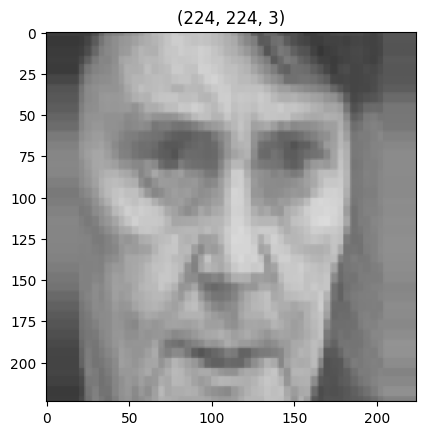

In [19]:
t_img , label = train_data.next()

def plotImages(img_arr, label):

  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

plotImages(t_img, label)

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

mc = ModelCheckpoint(filepath="best_model.h4", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [es, mc]

In [21]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 20.3296 - accuracy: 0.1906
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4\assets


INFO:tensorflow:Assets written to: best_model.h4\assets


10/10 [==============================] - 47s 5s/step - loss: 20.3296 - accuracy: 0.1906 - val_loss: 14.7325 - val_accuracy: 0.2500
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 15.8803 - accuracy: 0.2219
Epoch 2: val_accuracy improved from 0.25000 to 0.36719, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4\assets


INFO:tensorflow:Assets written to: best_model.h4\assets


10/10 [==============================] - 38s 4s/step - loss: 15.8803 - accuracy: 0.2219 - val_loss: 7.6592 - val_accuracy: 0.3672
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 8.5344 - accuracy: 0.3000
Epoch 3: val_accuracy did not improve from 0.36719
10/10 [==============================] - 19s 2s/step - loss: 8.5344 - accuracy: 0.3000 - val_loss: 9.2182 - val_accuracy: 0.3203
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 8.1610 - accuracy: 0.3094
Epoch 4: val_accuracy improved from 0.36719 to 0.40625, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4\assets


INFO:tensorflow:Assets written to: best_model.h4\assets


10/10 [==============================] - 38s 4s/step - loss: 8.1610 - accuracy: 0.3094 - val_loss: 6.4528 - val_accuracy: 0.4062
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 7.3603 - accuracy: 0.3562
Epoch 5: val_accuracy did not improve from 0.40625
10/10 [==============================] - 19s 2s/step - loss: 7.3603 - accuracy: 0.3562 - val_loss: 6.6630 - val_accuracy: 0.3711
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 6.8890 - accuracy: 0.3875
Epoch 6: val_accuracy did not improve from 0.40625
10/10 [==============================] - 18s 2s/step - loss: 6.8890 - accuracy: 0.3875 - val_loss: 6.8054 - val_accuracy: 0.3438
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 6.8776 - accuracy: 0.3938
Epoch 7: val_accuracy did not improve from 0.40625
10/10 [==============================] - 18s 2s/step - loss: 6.8776 - accuracy: 0.3938 - val_loss: 6.8051 - val_accuracy: 0.3594
Epoch 8/30
10/10 [==============================]

INFO:tensorflow:Assets written to: best_model.h4\assets


INFO:tensorflow:Assets written to: best_model.h4\assets


10/10 [==============================] - 38s 4s/step - loss: 5.1032 - accuracy: 0.4375 - val_loss: 6.9827 - val_accuracy: 0.4180
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 5.8322 - accuracy: 0.4125
Epoch 9: val_accuracy improved from 0.41797 to 0.42969, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4\assets


INFO:tensorflow:Assets written to: best_model.h4\assets


10/10 [==============================] - 39s 4s/step - loss: 5.8322 - accuracy: 0.4125 - val_loss: 5.2187 - val_accuracy: 0.4297
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 5.8692 - accuracy: 0.3875
Epoch 10: val_accuracy improved from 0.42969 to 0.44531, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4\assets


INFO:tensorflow:Assets written to: best_model.h4\assets


10/10 [==============================] - 41s 4s/step - loss: 5.8692 - accuracy: 0.3875 - val_loss: 5.1871 - val_accuracy: 0.4453
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 6.7703 - accuracy: 0.4250
Epoch 11: val_accuracy improved from 0.44531 to 0.48828, saving model to best_model.h4


INFO:tensorflow:Assets written to: best_model.h4\assets


INFO:tensorflow:Assets written to: best_model.h4\assets


10/10 [==============================] - 41s 4s/step - loss: 6.7703 - accuracy: 0.4250 - val_loss: 5.0712 - val_accuracy: 0.4883
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 4.4454 - accuracy: 0.4656
Epoch 12: val_accuracy did not improve from 0.48828
10/10 [==============================] - 19s 2s/step - loss: 4.4454 - accuracy: 0.4656 - val_loss: 5.2296 - val_accuracy: 0.4883
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 5.3336 - accuracy: 0.4594
Epoch 13: val_accuracy did not improve from 0.48828
10/10 [==============================] - 18s 2s/step - loss: 5.3336 - accuracy: 0.4594 - val_loss: 4.9670 - val_accuracy: 0.4648
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 5.4001 - accuracy: 0.4625
Epoch 14: val_accuracy did not improve from 0.48828
10/10 [==============================] - 18s 2s/step - loss: 5.4001 - accuracy: 0.4625 - val_loss: 6.9963 - val_accuracy: 0.4453
Epoch 15/30
10/10 [========================

In [23]:
from keras.models import load_model
model = load_model("C:/Users/Lenovo/face_emotion/best_model.h4")

In [24]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

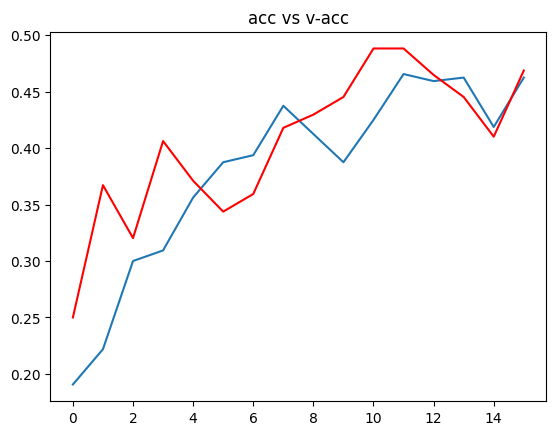

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

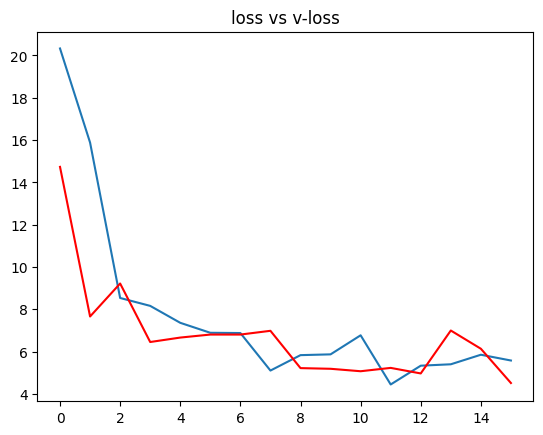

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [27]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 702ms/step
 the image is of sad


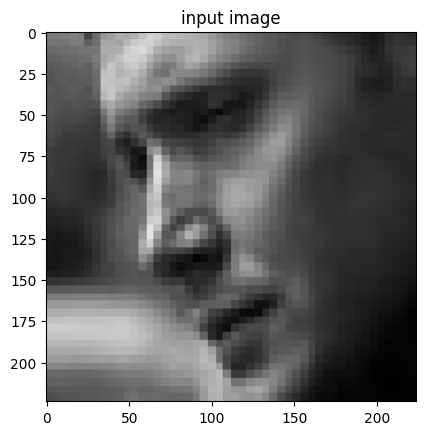

In [28]:
path = "C:/Users/Lenovo/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [2]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model = load_model("best_model.h4")

In [4]:
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [5]:
cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows

1/1 [==============================] - 0s 70ms/step



KeyboardInterrupt

